In [3]:
!pip install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms 

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

training_dataset = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
validation_dataset = datasets.MNIST(root='./data',train=False,download=True,transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  #print(image.shape)
  #retirar a normalização
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

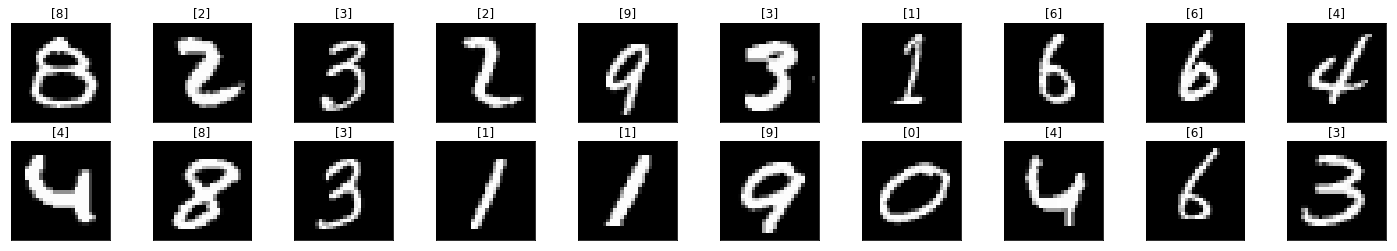

In [54]:
dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,D_out)
  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x
  

In [80]:
model = Classifier(28*28,125,65,10)
model


Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [0]:
epochs = 30
running_loss_history=[]
running_corrects_history=[]

val_running_loss_history=[]
val_running_corrects_history=[]


for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _,preds = torch.max(outputs,1)
    
    running_loss += loss.item()
    running_corrects+= torch.sum(preds == labels.data)    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0],-1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        
        _,val_preds = torch.max(val_outputs,1)
        val_running_loss += val_loss.item()
        val_running_corrects+= torch.sum(val_preds == val_labels.data)  
      
    epoch_loss = running_loss/len(training_loader)
    #epoch_loss = calcula o loss function atual
    epoch_acc = running_corrects.float()/len(training_loader)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = running_loss/len(validation_loader)
    #epoch_loss = calcula o loss function atual
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    #epoch_acc = pega a quantiade de acertos que teve em relacao ao total e seta a porcentagem de acertos
    val_running_loss_history.append(val_epoch_loss)    
    val_running_corrects_history.append(val_epoch_acc)    
    
    print('epoch: ',str(e+1))
    print('training_loss: {:.4f},{:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('validation_loss: {:.4f}, validation acc {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))
   #1x28x28

epoch:  1
training_loss: 0.9350,77.2683
validation_loss: 5.6098, validation acc 89.0200
epoch:  2
training_loss: 0.3799,89.2667
validation_loss: 2.2794, validation acc 90.7500
epoch:  3
training_loss: 0.3193,90.7767
validation_loss: 1.9159, validation acc 91.8600
epoch:  4
training_loss: 0.2868,91.6783
validation_loss: 1.7211, validation acc 92.3800
epoch:  5
training_loss: 0.2653,92.2983
validation_loss: 1.5919, validation acc 92.7600
epoch:  6
training_loss: 0.2446,92.9700
validation_loss: 1.4678, validation acc 93.0700
epoch:  7
training_loss: 0.2270,93.4467
validation_loss: 1.3622, validation acc 93.7700
epoch:  8
training_loss: 0.2111,93.9467
validation_loss: 1.2666, validation acc 94.2500
epoch:  9
training_loss: 0.1962,94.3950
validation_loss: 1.1770, validation acc 94.4600
epoch:  10
training_loss: 0.1830,94.6950
validation_loss: 1.0977, validation acc 94.7600
epoch:  11
training_loss: 0.1715,95.0017
validation_loss: 1.0290, validation acc 95.0400


In [0]:
#epoch:  30
#training_loss: 0.0187,99.3217
#validation_loss: 0.1120, validation acc 97.1500

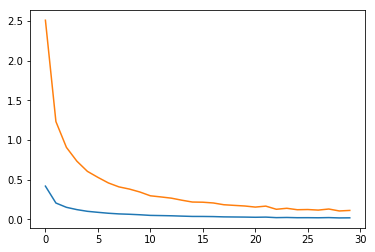

In [59]:
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_history,label='validation loss')

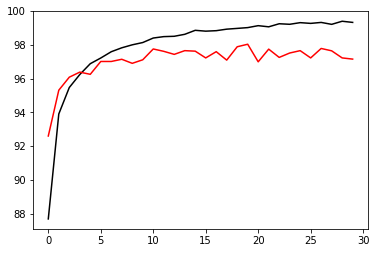

In [60]:
plt.plot(running_corrects_history,label='qnt de corretas  no treino',color="black")
plt.plot(val_running_corrects_history,label='qnt de corretas na validacao', color='red')

<Response [200]>


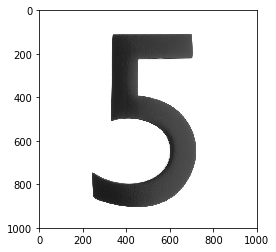

In [61]:
import requests
from PIL import Image
import PIL.ImageOps
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg%20%20%20%20Course%20content'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)
print(response)

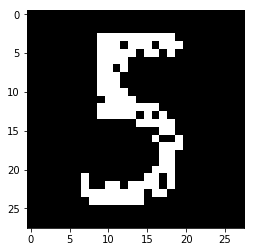

In [62]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [63]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

5


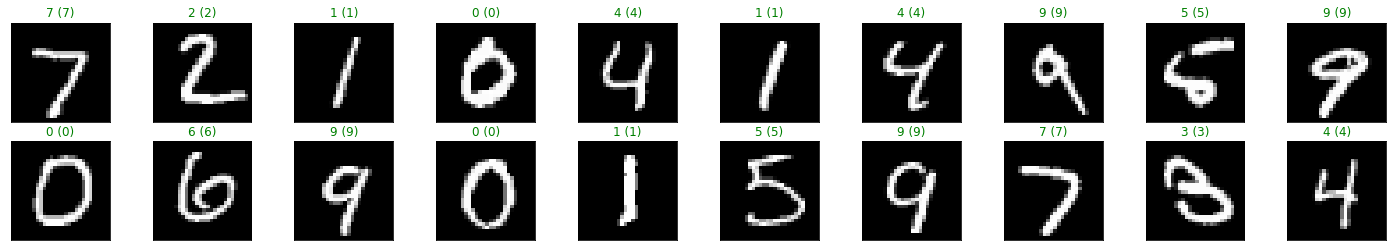

In [64]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_,preds = torch.max(output,1)

fig = plt.figure(figsize=(25,4))


for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()),str(labels[idx].item())),color=('green' if preds[idx]==labels[idx] else "red"))

<Response [200]>


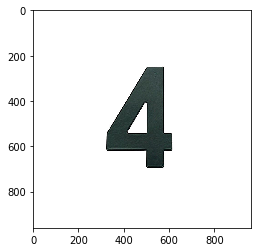

In [65]:
import requests
from PIL import Image
import PIL.ImageOps
url = 'https://telhanorte.vteximg.com.br/arquivos/ids/338302-960-960/Numero-4-de-aco-com-bucha-e-parafuso-145cm-preto-Bemfixa.jpg?v=636868969670370000'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)
print(response)


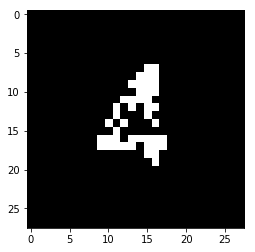

In [66]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [67]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

9


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Response [200]>
1


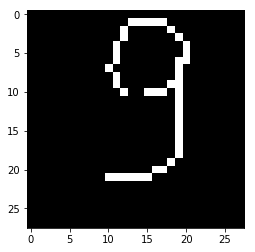

In [78]:
import requests
from PIL import Image
import PIL.ImageOps
import os



img = Image.open(os.path.join("/content/drive/My Drive/Colab_Notebooks/Resources/numeros_a_mao","9.JPG"))
plt.imshow(img)
print(response)
  
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))


img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())
